Chức năng của file: Với mỗi tham số C tìm được của các mô hình có dấu hiệu overfit, tiến hành áp dụng hiệu chỉnh L2 khi huấn luyện và đo chỉ số trên tập validation. Sau đó tính toán các độ đo trên tập test của mô hình được chọn.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import time
import seaborn as sns
from sklearn.decomposition import PCA
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
import joblib

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X, y), (X_test, y_test) = fashion_mnist.load_data()

X = X.reshape(X.shape[0], -1)
X = X.astype('float32') / 255.0

X_test = X_test.reshape(X_test.shape[0], -1)
X_test = X_test.astype('float32') / 255.0

In [7]:
fashion_mnist_labels = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

In [9]:
def evaluate(y_true, y_pred, data_set_name):

  print(f'----------------{data_set_name}----------------')
  accuracy_logReg = accuracy_score(y_true, y_pred)
  print(f'Accuracy: {accuracy_logReg:.3f}')

  precision_logReg = precision_score(y_true, y_pred, average='weighted')
  print(f'Precision: {precision_logReg:.3f}')

  recall_logReg = recall_score(y_true, y_pred, average='weighted')
  print(f'Recall: {recall_logReg:.3f}')

  confusion_matrix_logReg = confusion_matrix(y_true, y_pred)
  print('Confusion Matrix:\n', confusion_matrix_logReg)

  print(classification_report(y_true, y_pred, target_names=fashion_mnist_labels))

def create_data(X, y, X_test, n_components=100, test_size=0.2):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)

    if n_components < 100:
        pca = PCA(n_components=n_components)
        X_train = pca.fit_transform(X_train)
        X_val = pca.transform(X_val)
        X_test = pca.transform(X_test)
    return X_train, X_val, y_train, y_val, X_test

def train_predict_evaluate_each_parameter(X_train, y_train, X_test, y_test, model_path, solver='lbfgs', max_iter=10000, penalty=None, tol=1e-4, verbose=0, C=1):

  model_logReg = LogisticRegression(multi_class='multinomial', solver=solver, max_iter=max_iter, penalty=penalty, tol=tol, verbose=verbose, C=C)
  model_logReg.fit(X_train, y_train)

  y_pred_training = model_logReg.predict(X_train)
  evaluate(y_train, y_pred_training, 'Trainning set')

  y_pred_testing = model_logReg.predict(X_test)
  evaluate(y_test, y_pred_testing, 'Validation set')
  if model_path != None:
    joblib.dump(model_logReg, model_path)
    print('Model saved')

***Áp dụng hiệu chỉnh L2 với tỷ lệ 7/3 và solver 'lbfgs'***

In [13]:
# Với tỷ lệ train/validation : 7/3
X_train1, X_val1, y_train1, y_val1, X_test1 = create_data(X=X, y=y, X_test=X_test, n_components=100, test_size=0.3)
X_train1.shape, X_val1.shape, X_test1.shape

((42000, 784), (18000, 784), (10000, 784))

In [13]:
# solver 'lbfgs' voi ty le 7/3, tham so penelty='L2' va C=0.1
train_predict_evaluate_each_parameter(X_train1, y_train1, X_val1, y_val1, model_path='./model_logReg.pkl', solver='lbfgs', penalty='l2', C=0.1, verbose=1)

c:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


----------------Trainning set----------------
Accuracy: 0.873
Precision: 0.872
Recall: 0.873
Confusion Matrix:
 [[3559   10   63  167   13    6  338    0   41    3]
 [  10 4077   17   74    7    0   12    1    2    0]
 [  57    6 3240   35  487    1  350    0   24    0]
 [ 122   32   22 3790  119    0  102    1   12    0]
 [  10    4  312  133 3406    1  318    0   16    0]
 [   2    0    0    2    0 3973    0  146   19   58]
 [ 562    6  459  123  349    0 2648    1   51    1]
 [   0    0    0    0    0  120    0 3943    7  130]
 [  15    2   16   27   13   15   64   17 4027    4]
 [   0    1    0    1    0   56    0  150    3 3989]]
              precision    recall  f1-score   support

 T-shirt/top       0.82      0.85      0.83      4200
     Trouser       0.99      0.97      0.98      4200
    Pullover       0.78      0.77      0.78      4200
       Dress       0.87      0.90      0.89      4200
        Coat       0.78      0.81      0.79      4200
      Sandal       0.95      0.9

**Tính các chỉ số accuracy, precision, recall, confusion matrix trên tập test của mô hình được lựa chọn**

In [15]:
# Test solver 'lbfgs' voi ty le 7/3, tham so penalty='L2' va C=0.1
model = joblib.load('model_logReg.pkl')

y_pred = model.predict(X_test1)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.3f}')

precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision:.3f}')

recall = recall_score(y_test, y_pred, average='weighted')
print(f'Recall: {recall:.3f}')

print(classification_report(y_test, y_pred, target_names=fashion_mnist_labels))
confusion_matrix_logReg = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', confusion_matrix_logReg)

Accuracy: 0.845
Precision: 0.844
Recall: 0.845
              precision    recall  f1-score   support

 T-shirt/top       0.80      0.82      0.81      1000
     Trouser       0.98      0.96      0.97      1000
    Pullover       0.73      0.73      0.73      1000
       Dress       0.84      0.87      0.85      1000
        Coat       0.73      0.76      0.75      1000
      Sandal       0.94      0.93      0.93      1000
       Shirt       0.63      0.57      0.60      1000
     Sneaker       0.91      0.94      0.92      1000
         Bag       0.93      0.94      0.94      1000
  Ankle boot       0.94      0.94      0.94      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000

Confusion Matrix:
 [[817   2  16  48   5   4  96   0  12   0]
 [  3 957   4  27   6   0   1   0   2   0]
 [ 23   3 734  10 134   1  84   0  11   0]
 [ 33  10  15 868  31   0  35   0   8   0]
 [ 

**In ra confusion matrix của mô hình được chọn**

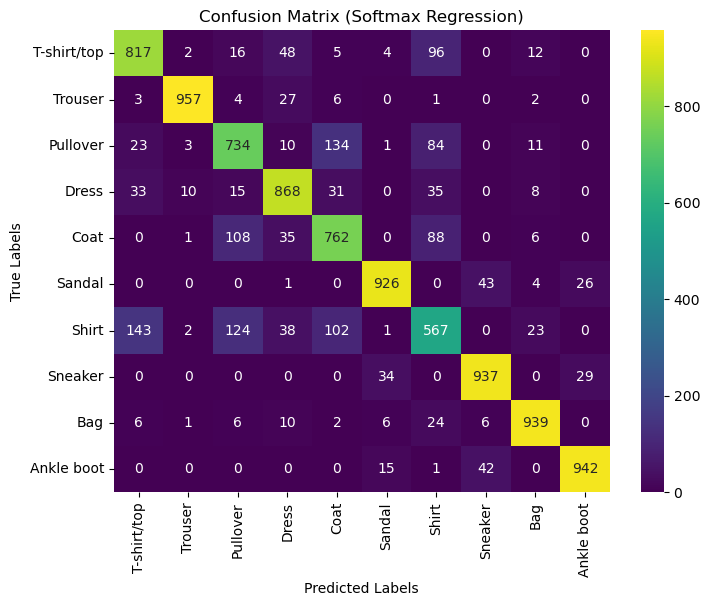

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Vẽ heatmap với colormap viridis
plt.figure(figsize=(8, 6))  # Kích thước biểu đồ
sns.heatmap(confusion_matrix_logReg, annot=True, xticklabels=fashion_mnist_labels, yticklabels=fashion_mnist_labels, cmap='viridis', fmt='g', cbar=True)

# Thêm tiêu đề và nhãn trục
plt.title('Confusion Matrix (Softmax Regression)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.savefig('confusion_matrix_softmax_reg.png', format='png', bbox_inches='tight')
# Hiển thị biểu đồ
plt.show()

In [18]:
# solver 'lbfgs' với tỷ lệ 7/3, không áp dụng hiệu chỉnh L2
train_predict_evaluate_each_parameter(X_train1, y_train1, X_val1, y_val1, model_path='./log_Reg_lbfgs_7_3_no_l2.pkl', solver='lbfgs', verbose=1)

c:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


----------------Trainning set----------------
Accuracy: 0.891
Precision: 0.890
Recall: 0.891
Confusion Matrix:
 [[3603    6   64  150   18    1  325    0   33    0]
 [   1 4139    2   49    4    0    5    0    0    0]
 [  50    0 3311   31  449    0  342    0   17    0]
 [ 111   17   27 3850  106    0   80    0    9    0]
 [  17    3  320  108 3434    0  302    0   16    0]
 [   0    0    0    0    0 4097    0   93    1    9]
 [ 518    3  430  121  342    0 2746    0   40    0]
 [   0    0    0    0    0   93    0 4024    1   82]
 [  12    0    9   13    8    0   38    1 4119    0]
 [   0    0    0    0    0   12    0  102    0 4086]]
              precision    recall  f1-score   support

 T-shirt/top       0.84      0.86      0.85      4200
     Trouser       0.99      0.99      0.99      4200
    Pullover       0.80      0.79      0.79      4200
       Dress       0.89      0.92      0.90      4200
        Coat       0.79      0.82      0.80      4200
      Sandal       0.97      0.9

In [19]:
# Test solver 'lbfgs' với tỷ lệ 7/3, không áp dụng hiệu chỉnh L2
model = joblib.load('./log_Reg_lbfgs_7_3_no_l2.pkl')

y_pred = model.predict(X_test1)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.3f}')

precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision:.3f}')

recall = recall_score(y_test, y_pred, average='weighted')
print(f'Recall: {recall:.3f}')

print(classification_report(y_test, y_pred, target_names=fashion_mnist_labels))
confusion_matrix_logReg = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', confusion_matrix_logReg)

Accuracy: 0.827
Precision: 0.825
Recall: 0.827
              precision    recall  f1-score   support

 T-shirt/top       0.78      0.79      0.78      1000
     Trouser       0.94      0.95      0.95      1000
    Pullover       0.72      0.72      0.72      1000
       Dress       0.81      0.83      0.82      1000
        Coat       0.72      0.74      0.73      1000
      Sandal       0.92      0.91      0.91      1000
       Shirt       0.61      0.56      0.58      1000
     Sneaker       0.91      0.93      0.92      1000
         Bag       0.91      0.92      0.91      1000
  Ankle boot       0.93      0.93      0.93      1000

    accuracy                           0.83     10000
   macro avg       0.82      0.83      0.83     10000
weighted avg       0.82      0.83      0.83     10000

Confusion Matrix:
 [[790   7  12  64   2   2 105   1  17   0]
 [  3 951   6  27   7   0   2   1   3   0]
 [ 29   7 722  12 129   0  86   1  14   0]
 [ 32  28  24 831  34   0  41   0  10   0]
 [ 

***Áp dụng hiệu chỉnh L2 với tỷ lệ 6/4 và solver 'lbfgs'***

In [6]:
# Với tỷ lệ train/validation : 6/4
X_train2, X_val2, y_train2, y_val2, X_test2 = create_data(X=X, y=y, X_test=X_test, n_components=100, test_size=0.4)
X_train2.shape, X_val2.shape, X_test2.shape

((36000, 784), (24000, 784), (10000, 784))

In [7]:
# solver 'lbfgs' voi ty le 6/4, penalty='l2', C=0.1
train_predict_evaluate_each_parameter(X_train2, y_train2, X_val2, y_val2, model_path=None, solver='lbfgs', penalty='l2', C=0.1, verbose=1)

c:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


----------------Trainning set----------------
Accuracy: 0.874
Precision: 0.873
Recall: 0.874
Confusion Matrix:
 [[3061   10   57  140   10    7  278    0   35    2]
 [  10 3498   13   61    5    0   12    1    0    0]
 [  47    6 2782   32  416    1  294    0   22    0]
 [ 110   27   23 3241  100    0   89    0   10    0]
 [   9    2  266  110 2913    1  284    0   15    0]
 [   2    0    0    2    0 3413    0  122   17   44]
 [ 479    7  378  100  308    0 2278    1   48    1]
 [   0    0    0    0    0  101    0 3381    8  110]
 [  10    2   12   22   11   13   51   12 3464    3]
 [   0    1    0    1    0   45    0  124    2 3427]]
              precision    recall  f1-score   support

 T-shirt/top       0.82      0.85      0.84      3600
     Trouser       0.98      0.97      0.98      3600
    Pullover       0.79      0.77      0.78      3600
       Dress       0.87      0.90      0.89      3600
        Coat       0.77      0.81      0.79      3600
      Sandal       0.95      0.9

***Áp dụng hiệu chỉnh L2 với solver='sag' và tỷ lệ 6/4***

In [8]:
# solver 'sag' voi ty le 6/4, penalty='l2', C=0.1
train_predict_evaluate_each_parameter(X_train2, y_train2, X_val2, y_val2, model_path=None, solver='sag', penalty='l2', C=0.1, verbose=1)

c:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


convergence after 69 epochs took 38 seconds
----------------Trainning set----------------
Accuracy: 0.874
Precision: 0.873
Recall: 0.874
Confusion Matrix:
 [[3060   10   56  141   10    7  279    0   35    2]
 [  10 3499   13   61    5    0   11    1    0    0]
 [  48    6 2782   29  417    1  297    0   20    0]
 [ 108   26   24 3242  101    0   88    1   10    0]
 [   9    2  264  111 2914    1  284    0   15    0]
 [   2    0    0    2    0 3416    0  121   16   43]
 [ 480    6  377  100  308    0 2280    1   47    1]
 [   0    0    0    0    0  101    0 3380    8  111]
 [  10    2   13   21   11   13   51   12 3464    3]
 [   0    1    0    1    0   45    0  123    2 3428]]
              precision    recall  f1-score   support

 T-shirt/top       0.82      0.85      0.84      3600
     Trouser       0.99      0.97      0.98      3600
    Pullover       0.79      0.77      0.78      3600
       Dress       0.87      0.90      0.89      3600
        Coat       0.77      0.81      0.7

***Áp dụng hiệu chỉnh L2 với solver='saga' và tỷ lệ 6/4***

In [9]:
# Solver ‘saga’ với tỷ lệ 6/4, tham số penalty=’L2’ và C=0.1
train_predict_evaluate_each_parameter(X_train2, y_train2, X_val2, y_val2, model_path=None, solver='saga', penalty='l2', C=0.1, verbose=1)

c:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


convergence after 130 epochs took 125 seconds
----------------Trainning set----------------
Accuracy: 0.874
Precision: 0.873
Recall: 0.874
Confusion Matrix:
 [[3062   10   56  140   10    7  278    0   35    2]
 [  10 3500   12   61    5    0   11    1    0    0]
 [  49    6 2782   29  417    1  296    0   20    0]
 [ 108   26   24 3244  101    0   86    1   10    0]
 [   9    2  266  111 2913    1  283    0   15    0]
 [   2    0    0    2    0 3416    0  121   16   43]
 [ 480    6  377   99  307    0 2282    1   47    1]
 [   0    0    0    0    0  101    0 3381    8  110]
 [  10    2   13   21   11   12   52   12 3464    3]
 [   0    1    0    1    0   45    0  123    2 3428]]
              precision    recall  f1-score   support

 T-shirt/top       0.82      0.85      0.84      3600
     Trouser       0.99      0.97      0.98      3600
    Pullover       0.79      0.77      0.78      3600
       Dress       0.87      0.90      0.89      3600
        Coat       0.77      0.81      0